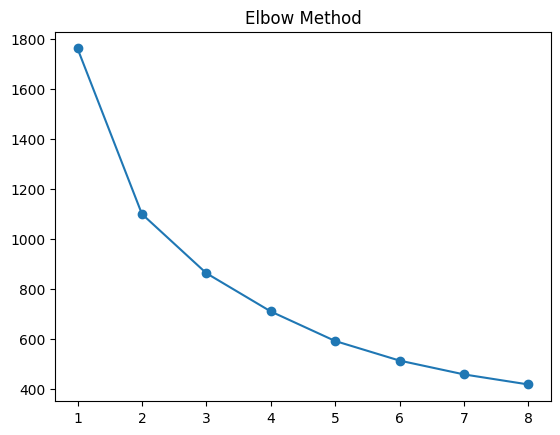

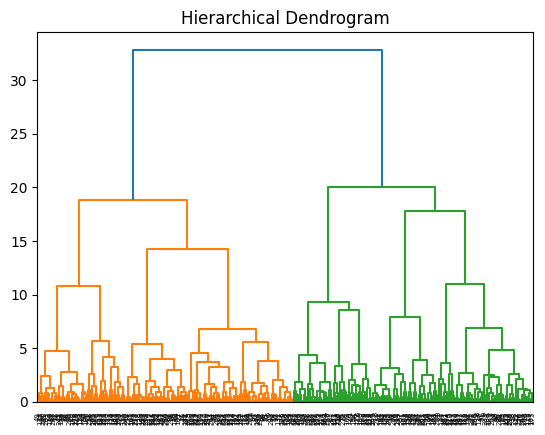

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy

df = pd.read_csv("../data/heart_clean.csv")
X = df.drop("target", axis=1)
y = df["target"]

X_scaled = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=3).fit_transform(X_scaled)

# Elbow method
inertias = []
K = range(1,9)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_pca)
    inertias.append(km.inertia_)

plt.plot(K,inertias,marker='o')
plt.title("Elbow Method")
plt.show()

# Hierarchical clustering dendrogram
Z = hierarchy.linkage(X_pca, method='ward')
hierarchy.dendrogram(Z)
plt.title("Hierarchical Dendrogram")
plt.show()
